<a href="https://colab.research.google.com/github/dsri07/Letsgrowmore-task/blob/main/IRIS_FLOWER_CLASSIFICATION_USING_KMEANS_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install sklearn

LOADING IRIS DATASETS USING SKLEARN AND PANDAS :

In [80]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
df['class']=load_iris()['target']
df['class']=df['class'].replace(0,'iris_setosa')
df['class']=df['class'].replace(1,'iris_versicolor')
df['class']=df['class'].replace(2,'iris_virginica')#first five data of dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [81]:
#last five data of dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,iris_virginica
146,6.3,2.5,5.0,1.9,iris_virginica
147,6.5,3.0,5.2,2.0,iris_virginica
148,6.2,3.4,5.4,2.3,iris_virginica
149,5.9,3.0,5.1,1.8,iris_virginica


CHECK FOR NAN/NULL VALUES IN DATASET :

In [82]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
class                False
dtype: bool

In [83]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

IMPORTANT INFORMATION OF THE DATASET :

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


IMPORTING KMEANS CLUSTERING ALGORITHM USING
SKLEARN

In [86]:
from sklearn.cluster import KMeans
#to view all parameter of the KMeans 
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

SCALING FEATURES USING MINMAX SCALER 
(ONLY 'petal_length' AND 'petal_width'):

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
petal_length_width = scaler.fit_transform(df.iloc[:,[2,3]])
df_scaled = pd.DataFrame(petal_length_width)
df_scaled = df_scaled.rename(columns={0:'petal_length',1:'petal_width'})

ELBOW METHOD TO FIND PERFECT NUMBER OF CLUSTERS :

In [88]:
sum_of_squares = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(petal_length_width)
    sum_of_squares.append(km.inertia_)

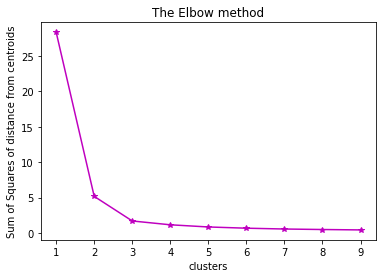

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline       
plt.plot(np.arange(1,10), sum_of_squares,marker='*',c='m')
plt.title('The Elbow method')
plt.xlabel('clusters')
plt.ylabel('Sum of Squares of distance from centroids')
plt.show()

By observing the elbow method graph the optimum number of clusters is " 3 "

In [90]:
Y_pred = KMeans(n_clusters=3).fit_predict(petal_length_width)
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [91]:
df_scaled['cluster'] = Y_pred
df_scaled.head(3)

,petal_length,petal_width,cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2


In [92]:
df_scaled.tail(3)

,petal_length,petal_width,cluster
147,0.711864,0.791667,0
148,0.745763,0.916667,0
149,0.694915,0.708333,0


VISUALIZATION USING MATPLOTLIB AND SEABORN :

Text(0.5, 1.0, 'CLUSTERS')

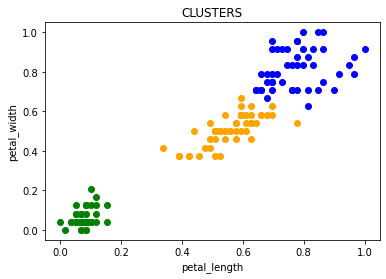

In [93]:
#using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
df1=df_scaled[df_scaled.cluster == 0]
df2=df_scaled[df_scaled.cluster == 1]
df3=df_scaled[df_scaled.cluster == 2]
plt.figure(figsize=(6,4))
plt.scatter(df1.petal_length,df1.petal_width, color='blue' )
plt.scatter(df2.petal_length,df2.petal_width, color='orange' )
plt.scatter(df3.petal_length,df3.petal_width, color='green' )
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('CLUSTERS')

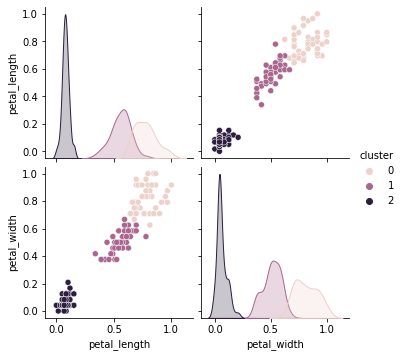

In [94]:
#visualization of data focusing petal_length and petal_width by k_menans algorithm
import seaborn as sns
sns.pairplot(data = df_scaled, hue = 'cluster')

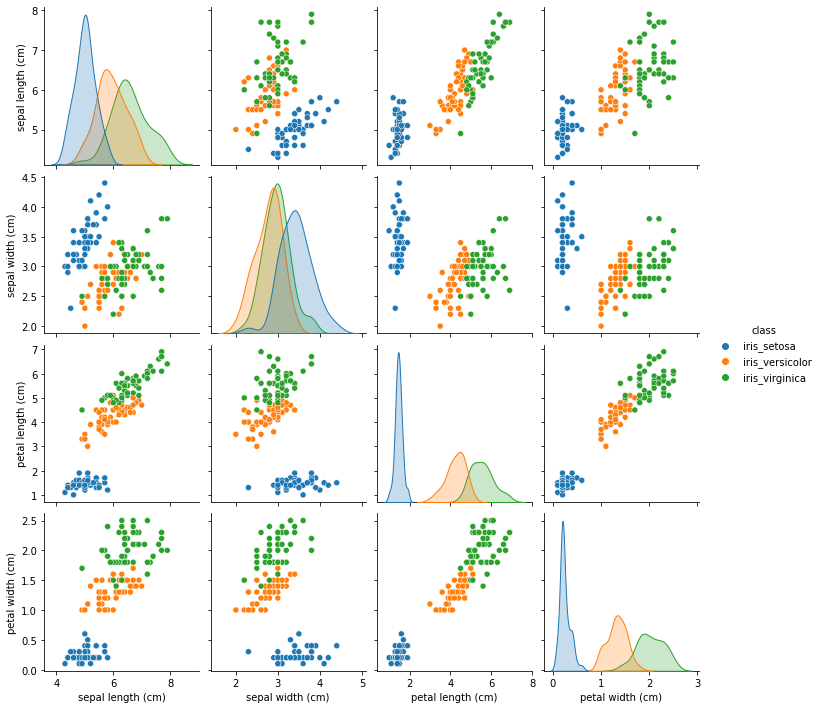

In [95]:
#visualization of the given data including all the features
sns.pairplot(data = df , hue = 'class')